In [8]:
!pip install lightgbm


Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 10.0 MB/s eta 0:00:0000:0100:01


In [2]:
import numpy as np
import pandas as pd
import pickle   # for saving/loading models
from sklearn.preprocessing import StandardScaler
import joblib

In [3]:
import joblib
features_df = pd.read_parquet("panel_augmented2.parquet")
model_filepath = "market_simulator_model2.joblib"
demand_model = joblib.load(model_filepath)

In [13]:
features_df.describe()

,store,week_x,upc,unit_price,unit_cost,margin_pct,units_sold,revenue,promo_flag,profit,...,discount_depth,price_change,price_vs_ref_ratio,quarter,is_month_start,is_month_end,day_of_month,has_special_event,brand_encoded,promo_code_encoded
count,5.992120e+06,5.992120e+06,5.992120e+06,5.992120e+06,5.992120e+06,5.992120e+06,5.992120e+06,5.992120e+06,5.992120e+06,5.992120e+06,...,5.992120e+06,5.945658e+06,5.992120e+06,5.992120e+06,5.992120e+06,5.992120e+06,5.992120e+06,5.992120e+06,5.992120e+06,5.992120e+06
mean,8.375160e+01,2.164954e+02,3.827690e+09,2.553876e+00,2.218617e+00,1.781590e+01,3.403722e+01,6.188969e+01,3.150708e-01,1.781590e+01,...,9.687180e+00,1.352247e-03,9.031282e-01,2.486999e+00,2.302519e-01,2.474779e-01,1.582857e+01,1.784816e-01,9.878005e+00,2.717211e+00
min,2.000000e+00,2.000000e+00,4.180000e+02,1.700000e-01,5.500000e-05,-9.999000e+01,1.000000e+00,1.700000e-01,0.000000e+00,-9.999000e+01,...,-4.345896e+02,-7.790000e+00,2.360541e-02,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.600000e+01,1.220000e+02,1.660000e+09,9.900000e-01,7.900200e-01,6.820000e+00,3.000000e+00,7.590000e+00,0.000000e+00,6.820000e+00,...,2.905342e+00,0.000000e+00,8.547329e-01,1.000000e+00,0.000000e+00,0.000000e+00,8.000000e+00,0.000000e+00,7.000000e+00,3.000000e+00
50%,8.900000e+01,2.210000e+02,3.828100e+09,1.890000e+00,1.525014e+00,2.044000e+01,9.000000e+00,1.602000e+01,0.000000e+00,2.044000e+01,...,1.325211e+01,0.000000e+00,8.674789e-01,2.000000e+00,0.000000e+00,0.000000e+00,1.600000e+01,0.000000e+00,1.100000e+01,3.000000e+00
75%,1.140000e+02,3.170000e+02,4.900001e+09,3.490000e+00,2.983043e+00,3.189000e+01,2.600000e+01,3.951000e+01,1.000000e+00,3.189000e+01,...,1.452671e+01,2.000000e-02,9.709466e-01,4.000000e+00,0.000000e+00,0.000000e+00,2.300000e+01,0.000000e+00,1.200000e+01,3.000000e+00
max,1.460000e+02,3.990000e+02,7.137052e+10,8.290000e+00,1.030000e+01,9.999000e+01,1.029100e+04,3.785313e+04,1.000000e+00,9.999000e+01,...,9.763946e+01,8.090000e+00,5.345896e+00,4.000000e+00,1.000000e+00,1.000000e+00,3.100000e+01,1.000000e+00,1.900000e+01,4.000000e+00
std,3.683972e+01,1.136151e+02,2.571043e+09,1.999827e+00,2.074025e+00,2.329226e+01,1.037037e+02,2.587228e+02,4.645441e-01,2.329226e+01,...,7.844596e+00,6.926976e-01,7.844596e-02,1.145982e+00,4.209941e-01,4.315467e-01,8.819386e+00,3.829176e-01,4.338412e+00,1.179126e+00


In [4]:
model_features = [
    "lag_units_1w",
    "lag_units_2w",
    "lag_units_3w",
    "lag_units_4w",
    "rolling_mean_4w",
    "rolling_std_4w",
    "rolling_mean_8w",
    "rolling_std_8w",
    "rolling_mean_12w",
    "rolling_std_12w",
    "unit_price",
    "discount_depth",
    "price_change",
    "price_vs_ref_ratio",
    "ref_price",
    "promo_flag",
    "promo_code_encoded",
    "month",
    "quarter",
    "weekofyr",
    "is_month_start",
    "is_month_end",
    "has_special_event",
    "temp_mean",
    "temp_max",
    "precip_sum",
    "weather_missing_flag",
    "cpi_bev",
    "brand_encoded",
    "margin_pct",
    "store"
]

In [5]:
# ==========================================================
# 4️⃣ Multi-UPC Environment
# ==========================================================
class MultiUPCEnv:
    def __init__(self, demand_model, features_df, upc_list, price_change_bounds=(-0.1, 0.1), noise_std=0.0):
        self.demand_model = demand_model
        self.features_df = features_df
        self.upc_list = upc_list
        self.price_change_bounds = price_change_bounds
        self.noise_std = noise_std
        self.current_upc = None
        self.week_idx_ptr = 0
        self.done = False

    def reset(self):
        self.current_upc = np.random.choice(self.upc_list)
        df_upc = self.features_df[self.features_df["upc"] == self.current_upc]
        self.weeks = sorted(df_upc["week_x"].unique())
        self.week_idx_ptr = 0
        row = df_upc[df_upc["week_x"] == self.weeks[self.week_idx_ptr]].iloc[0]
        self.current_price = row["unit_price"]
        self.done = False
        return self._get_state(row)

    def _get_state(self, row):
        state = {feat: row[feat] for feat in model_features if feat in row.index}
        state["unit_price"] = self.current_price
        state["price_change"] = 0.0
        return state

    def step(self, action):
        df_upc = self.features_df[self.features_df["upc"] == self.current_upc]
        change_frac = np.clip(action, self.price_change_bounds[0], self.price_change_bounds[1])
        new_price = float(np.clip(self.current_price * (1 + change_frac), 0.5, 10.0))

        row = df_upc[df_upc["week_x"] == self.weeks[self.week_idx_ptr]].iloc[0]
        model_input = row.copy()
        model_input["unit_price"] = new_price
        model_input["price_change"] = change_frac

        X = model_input[model_features].values.reshape(1, -1)
        base_units = self.demand_model.predict(X)[0]
        units_sold = base_units * (1 + np.random.normal(0, self.noise_std))
        units_sold = max(units_sold, 0.0)

        cost = row.get("cost_real", row.get("unit_cost", 0))
        profit = (new_price - cost) * units_sold
        #reward = np.tanh(profit / 1000.0)
        #reward = np.tanh(profit / 20000.0)
        # reward = profit / 20000.0
        # reward = np.clip(reward, -1, 1)
        #reward = np.tanh(profit / 15000.0)
        #reward = np.tanh(profit / 200.0) * 2.0
        reward = np.tanh(profit / 2000.0) * 10.0
        
        self.current_price = new_price
        self.week_idx_ptr += 1
        if self.week_idx_ptr >= len(self.weeks):
            self.done = True
            next_state = None
        else:
            next_row = df_upc[df_upc["week_x"] == self.weeks[self.week_idx_ptr]].iloc[0]
            next_state = self._get_state(next_row)
        info = {"profit": profit, "price": new_price, "units": units_sold}
        return next_state, reward, self.done, info

Double DQN

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
import random
import numpy as np
from collections import deque

class QNetwork(nn.Module):
    def __init__(self, state_dim, action_dim):
        super(QNetwork, self).__init__()
        # self.layers = nn.Sequential(
        #     nn.Linear(state_dim, 128),
        #     nn.ReLU(),
        #     nn.Linear(128, 128),
        #     nn.ReLU(),
        #     nn.Linear(128, action_dim)
        # )
        self.layers = nn.Sequential(
            nn.Linear(state_dim, 128),
            nn.ReLU(),
            nn.BatchNorm1d(128),
            nn.Dropout(0.1),
            nn.Linear(128, 128),
            nn.ReLU(),
            nn.Linear(128, action_dim)
        )


    def forward(self, x):
        return self.layers(x)

class DoubleDQNAgent:
    def __init__(
        self,
        state_dim,
        action_dim,
        lr=1e-4,
        gamma=0.99,
        eps_start=1.0,
        #eps_min=0.02,
        eps_min=0.05,
        #eps_decay=0.995,
        eps_decay=0.999,
        batch_size=64,
        buffer_size=100000,
        target_update=20,
        device="cuda" if torch.cuda.is_available() else "cpu"
    ):
        self.device = device
        self.action_dim = action_dim
        self.gamma = gamma
        self.epsilon = eps_start
        self.eps_min = eps_min
        self.eps_decay = eps_decay
        self.batch_size = batch_size
        self.target_update = target_update
        self.step_count = 0

        self.policy_net = QNetwork(state_dim, action_dim).to(device)
        self.target_net = QNetwork(state_dim, action_dim).to(device)
        self.optimizer = optim.Adam(self.policy_net.parameters(), lr=lr)
        self.memory = deque(maxlen=buffer_size)
        self.loss_fn = nn.MSELoss()

        # Sync target with policy at start
        self.target_net.load_state_dict(self.policy_net.state_dict())

    # def select_action(self, state):
    #     if np.random.rand() < self.epsilon:
    #         return random.randrange(self.action_dim)
    #     state = torch.FloatTensor(state).unsqueeze(0).to(self.device)
    #     with torch.no_grad():
    #         q_values = self.policy_net(state)
    #     return torch.argmax(q_values).item()
    def decay_epsilon(self):
        self.epsilon = max(self.eps_min, self.epsilon * self.eps_decay)
    def update_target(self):
        self.target_net.load_state_dict(self.policy_net.state_dict())

    def select_action(self, state):
        # Convert dict → numpy array if needed
        if isinstance(state, dict):
            state = np.array(list(state.values()), dtype=np.float32)

        if np.random.rand() < self.epsilon:
            return random.randrange(self.action_dim)

        state = torch.FloatTensor(state).unsqueeze(0).to(self.device)
        # with torch.no_grad():
        #     q_values = self.policy_net(state)
        self.policy_net.eval()
        with torch.no_grad():
            q_values = self.policy_net(state)
        self.policy_net.train()

        return q_values.argmax().item()


    def store(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))

    def train(self):
        if len(self.memory) < self.batch_size:
            return

        batch = random.sample(self.memory, self.batch_size)
        states, actions, rewards, next_states, dones = zip(*batch)

        states = torch.FloatTensor(states).to(self.device)
        actions = torch.LongTensor(actions).unsqueeze(1).to(self.device)
        rewards = torch.FloatTensor(rewards).unsqueeze(1).to(self.device)
        next_states = torch.FloatTensor(next_states).to(self.device)
        dones = torch.FloatTensor(dones).unsqueeze(1).to(self.device)

        # Current Q-values
        curr_Q = self.policy_net(states).gather(1, actions)

        # Double DQN target Q-values
        with torch.no_grad():
            best_actions = self.policy_net(next_states).argmax(1).unsqueeze(1)
            target_Q = self.target_net(next_states).gather(1, best_actions)
            target_Q = rewards + self.gamma * target_Q * (1 - dones)

        loss = self.loss_fn(curr_Q, target_Q)

        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

        # Update epsilon
        self.epsilon = max(self.eps_min, self.epsilon * self.eps_decay)

        # Periodic target network sync
        self.step_count += 1
        if self.step_count % self.target_update == 0:
            self.target_net.load_state_dict(self.policy_net.state_dict())


In [9]:
# ==========================================================
# 7️⃣ Evaluate Trained Agent (No Exploration)
# ==========================================================
agent.epsilon = 0.0  # fully greedy (no random actions)

test_rewards = []
test_profits = []

N_TEST_EPISODES = 100  # you can bump this to 50–100 for more stable averages

for ep in range(N_TEST_EPISODES):
    state = env.reset()
    done = False
    total_reward = 0
    total_profit = 0
    while not done:
        action = agent.select_action(state)
        next_state, reward, done, info = env.step(action)
        total_reward += reward
        total_profit += info.get("profit", 0)
        state = next_state
    test_rewards.append(total_reward)
    test_profits.append(total_profit)

print(f"\n✅ Average Test Reward: {np.mean(test_rewards):.2f}")
print(f"✅ Average Test Profit: ${np.mean(test_profits):.2f}")



✅ Average Test Reward: -17.79
✅ Average Test Profit: $-1453.70


✅ Detected correct input size: 31
Episode 10/1000, Total Reward: 3.78, Epsilon: 0.12
Episode 20/1000, Total Reward: 3.85, Epsilon: 0.05
Episode 30/1000, Total Reward: 14.74, Epsilon: 0.05
Episode 40/1000, Total Reward: 6.50, Epsilon: 0.05
Episode 50/1000, Total Reward: -4.61, Epsilon: 0.05
Episode 60/1000, Total Reward: 166.51, Epsilon: 0.05
Episode 70/1000, Total Reward: 14.41, Epsilon: 0.05
Episode 80/1000, Total Reward: 6.01, Epsilon: 0.05
Episode 90/1000, Total Reward: 13.46, Epsilon: 0.05
Episode 100/1000, Total Reward: 12.25, Epsilon: 0.05
Episode 110/1000, Total Reward: 24.76, Epsilon: 0.05
Episode 120/1000, Total Reward: 10.91, Epsilon: 0.05
Episode 130/1000, Total Reward: -0.34, Epsilon: 0.05
Episode 140/1000, Total Reward: 5.10, Epsilon: 0.05
Episode 150/1000, Total Reward: 9.69, Epsilon: 0.05
Episode 160/1000, Total Reward: -1.22, Epsilon: 0.05
Episode 170/1000, Total Reward: 54.61, Epsilon: 0.05
Episode 180/1000, Total Reward: 17.78, Epsilon: 0.05
Episode 190/1000, Total Re

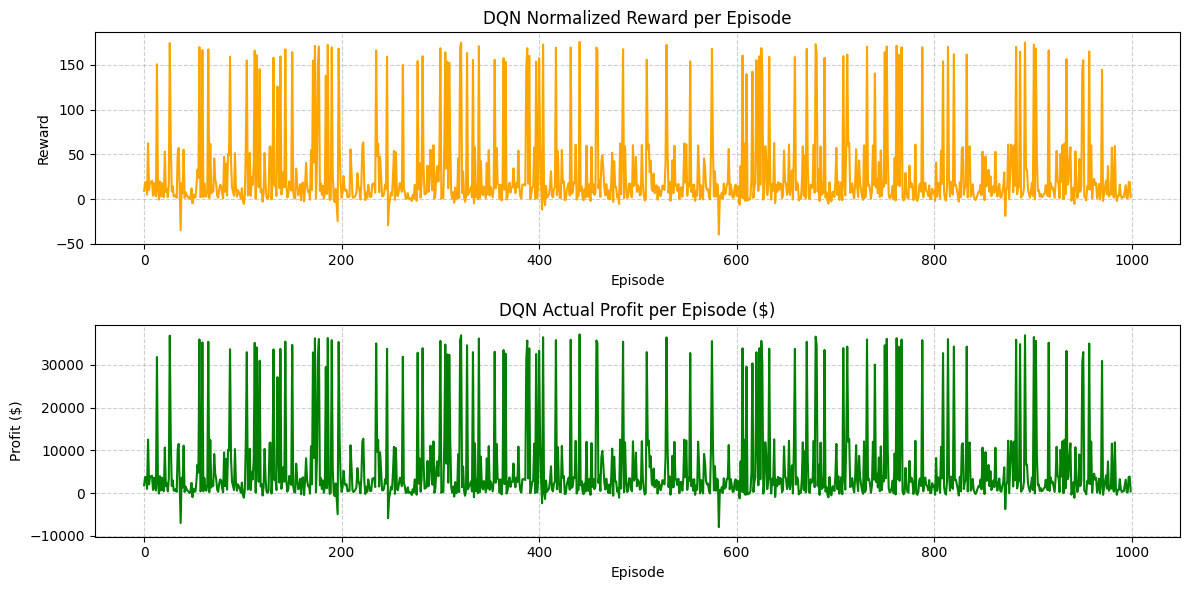

In [10]:
# ==========================================================
# 5️⃣ Initialize Agent + Environment (Fixed)
# ==========================================================
import matplotlib.pyplot as plt
action_space = [-0.10, -0.05, 0.0, 0.05, 0.10]

# Build a sample env and dynamically detect correct input size
upc_list = features_df["upc"].unique()[:10]
env = MultiUPCEnv(demand_model, features_df, upc_list, noise_std=0.02)
sample_state = env.reset()
state_dim = len(sample_state)
print("✅ Detected correct input size:", state_dim)

# Now initialize the agent with that state dimension
agent = DoubleDQNAgent(
    state_dim=state_dim,
    action_dim=len(action_space),
    lr=1e-4,
    eps_decay=0.999,
    eps_min=0.05
)


# ==========================================================
# 6️⃣ Training Loop
# ==========================================================
# EPISODES = 200

# TARGET_UPDATE_FREQ = 5

# EPISODES = 300
# TARGET_UPDATE_FREQ = 10
# BATCH_SIZE = 64

EPISODES = 1000
BATCH_SIZE = 64
TARGET_UPDATE_FREQ = 20


episode_rewards = []
episode_profits = []
for ep in range(1, EPISODES + 1):
    state = env.reset()
    done = False
    total_reward = 0
    episode_profit = 0
    while not done:
        action = agent.select_action(state)
        next_state, reward, done, info = env.step(action)
        agent.store(
            np.array([float(state[f]) for f in state.keys()], dtype=np.float32),
            action,
            reward,
            np.array([float(next_state[f]) for f in next_state.keys()], dtype=np.float32) if next_state else np.zeros_like(list(state.values())),
            done
        )
        agent.train()
        state = next_state
        total_reward += reward
        episode_profit += info["profit"]

    if ep % TARGET_UPDATE_FREQ == 0:
        agent.update_target()
    agent.decay_epsilon()
    episode_rewards.append(total_reward)
    episode_profits.append(episode_profit)

    if ep % 10 == 0:
        print(f"Episode {ep}/{EPISODES}, Total Reward: {total_reward:.2f}, Epsilon: {agent.epsilon:.2f}")

plt.figure(figsize=(12,6))
plt.subplot(2,1,1)
plt.plot(episode_rewards, color='orange')
plt.title("DQN Normalized Reward per Episode")
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.grid(True, linestyle='--', alpha=0.6)

plt.subplot(2,1,2)
plt.plot(episode_profits, color='green')
plt.title("DQN Actual Profit per Episode ($)")
plt.xlabel("Episode")
plt.ylabel("Profit ($)")
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()



In [11]:
# Evaluate trained agent
agent.epsilon = 0.0
profits, rewards = [], []
for _ in range(10):
    state = env.reset()
    done = False
    total_profit, total_reward = 0, 0
    while not done:
        action = agent.select_action(state)
        next_state, reward, done, info = env.step(action)
        total_profit += info["profit"]
        total_reward += reward
        state = next_state
    profits.append(total_profit)
    rewards.append(total_reward)

print(f"Avg Reward: {np.mean(rewards):.2f}, Avg Profit: ${np.mean(profits):.2f}")


Avg Reward: -1.12, Avg Profit: $-223.85


In [12]:
# Evaluate trained agent
agent.epsilon = 0.0
profits, rewards = [], []
for _ in range(100):
    state = env.reset()
    done = False
    total_profit, total_reward = 0, 0
    while not done:
        action = agent.select_action(state)
        next_state, reward, done, info = env.step(action)
        total_profit += info["profit"]
        total_reward += reward
        state = next_state
    profits.append(total_profit)
    rewards.append(total_reward)

print(f"Avg Reward: {np.mean(rewards):.2f}, Avg Profit: ${np.mean(profits):.2f}")


Avg Reward: -7.76, Avg Profit: $-1522.86


In [15]:
state = env.reset()
print(type(state))
print("Number of features:", len(state))
print("State keys:\n", list(state.keys())[:10])  # print first 10 keys

# print first few key-value pairs
for i, (k, v) in enumerate(state.items()):
    print(f"{k}: {v}")
    if i == 10:
        break


<class 'dict'>
Number of features: 31
State keys:
 ['lag_units_1w', 'lag_units_2w', 'lag_units_3w', 'lag_units_4w', 'rolling_mean_4w', 'rolling_std_4w', 'rolling_mean_8w', 'rolling_std_8w', 'rolling_mean_12w', 'rolling_std_12w']
lag_units_1w: 8.0
lag_units_2w: nan
lag_units_3w: nan
lag_units_4w: nan
rolling_mean_4w: nan
rolling_std_4w: nan
rolling_mean_8w: nan
rolling_std_8w: nan
rolling_mean_12w: nan
rolling_std_12w: nan
unit_price: 6.99


✅ Detected correct input size: 31
Episode 10/1000, Reward: 53.20, Profit: 10682.40, Epsilon: 0.11
Episode 20/1000, Reward: 10.69, Profit: 2138.42, Epsilon: 0.05
Episode 30/1000, Reward: 21.06, Profit: 4213.25, Epsilon: 0.05
Episode 40/1000, Reward: 10.78, Profit: 2156.53, Epsilon: 0.05
Episode 50/1000, Reward: 21.08, Profit: 4217.94, Epsilon: 0.05
Episode 60/1000, Reward: 151.42, Profit: 31197.76, Epsilon: 0.05
Episode 70/1000, Reward: 9.30, Profit: 1859.93, Epsilon: 0.05
Episode 80/1000, Reward: 19.07, Profit: 3814.85, Epsilon: 0.05
Episode 90/1000, Reward: 9.24, Profit: 1847.57, Epsilon: 0.05
Episode 100/1000, Reward: 53.65, Profit: 10772.81, Epsilon: 0.05
Episode 110/1000, Reward: 9.34, Profit: 1867.38, Epsilon: 0.05
Episode 120/1000, Reward: 9.21, Profit: 1841.56, Epsilon: 0.05
Episode 130/1000, Reward: 18.81, Profit: 3763.33, Epsilon: 0.05
Episode 140/1000, Reward: 61.07, Profit: 12254.03, Epsilon: 0.05
Episode 150/1000, Reward: 158.39, Profit: 32954.72, Epsilon: 0.05
Episode 160/

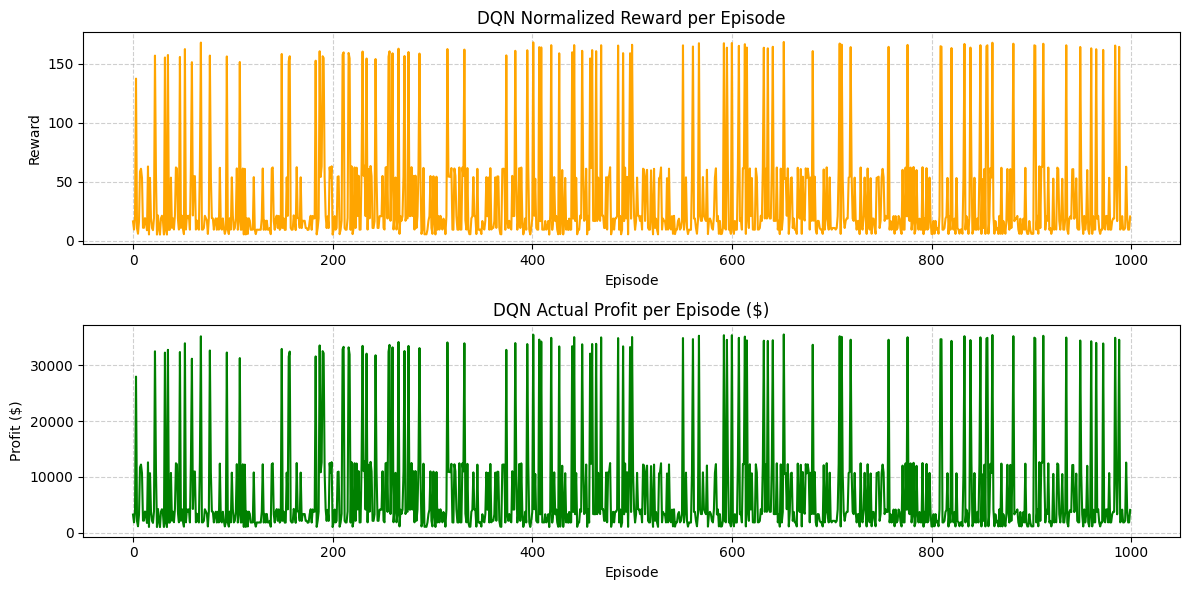

In [19]:
import numpy as np
import matplotlib.pyplot as plt

def clean_state(state):
    arr = np.array(list(state.values()), dtype=np.float32)
    arr = np.nan_to_num(arr, nan=0.0, posinf=0.0, neginf=0.0)
    return arr

# ==========================================================
# 5️⃣ Initialize Agent + Environment (Fixed)
# ==========================================================
action_space = [-0.10, -0.05, 0.0, 0.05, 0.10]

upc_list = features_df["upc"].unique()[:10]
env = MultiUPCEnv(demand_model, features_df, upc_list, noise_std=0.02)
sample_state = env.reset()
state_dim = len(sample_state)
print("✅ Detected correct input size:", state_dim)

agent = DoubleDQNAgent(
    state_dim=state_dim,
    action_dim=len(action_space),
    lr=1e-4,
    eps_decay=0.999,
    eps_min=0.05
)

# ==========================================================
# 6️⃣ Training Loop
# ==========================================================
EPISODES = 1000
BATCH_SIZE = 64
TARGET_UPDATE_FREQ = 20

episode_rewards = []
episode_profits = []

for ep in range(1, EPISODES + 1):
    raw_state = env.reset()
    state = clean_state(raw_state)
    done = False
    total_reward = 0
    episode_profit = 0

    while not done:
        action = agent.select_action(state)
        next_raw_state, reward, done, info = env.step(action)
        #next_state = clean_state(next_raw_state)  # 🧹 clean next_state too!
        next_state = clean_state(next_raw_state) if next_raw_state is not None else np.zeros_like(state)


        agent.store(
            state,
            action,
            reward,
            next_state,
            done
        )
        agent.train()
        state = next_state
        total_reward += reward
        episode_profit += info["profit"]

    if ep % TARGET_UPDATE_FREQ == 0:
        agent.update_target()
    agent.decay_epsilon()

    episode_rewards.append(total_reward)
    episode_profits.append(episode_profit)

    if ep % 10 == 0:
        print(f"Episode {ep}/{EPISODES}, Reward: {total_reward:.2f}, Profit: {episode_profit:.2f}, Epsilon: {agent.epsilon:.2f}")

# ==========================================================
# 7️⃣ Plot Rewards + Profits
# ==========================================================
plt.figure(figsize=(12,6))

plt.subplot(2,1,1)
plt.plot(episode_rewards, color='orange')
plt.title("DQN Normalized Reward per Episode")
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.grid(True, linestyle='--', alpha=0.6)

plt.subplot(2,1,2)
plt.plot(episode_profits, color='green')
plt.title("DQN Actual Profit per Episode ($)")
plt.xlabel("Episode")
plt.ylabel("Profit ($)")
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


In [20]:
# Evaluate trained agent
agent.epsilon = 0.0
profits, rewards = [], []
for _ in range(100):
    state = env.reset()
    done = False
    total_profit, total_reward = 0, 0
    while not done:
        action = agent.select_action(state)
        next_state, reward, done, info = env.step(action)
        total_profit += info["profit"]
        total_reward += reward
        state = next_state
    profits.append(total_profit)
    rewards.append(total_reward)

print(f"Avg Reward: {np.mean(rewards):.2f}, Avg Profit: ${np.mean(profits):.2f}")


Avg Reward: 30.08, Avg Profit: $6119.00


Text(0.5, 1.0, 'Smoothed Profit (20-episode MA)')

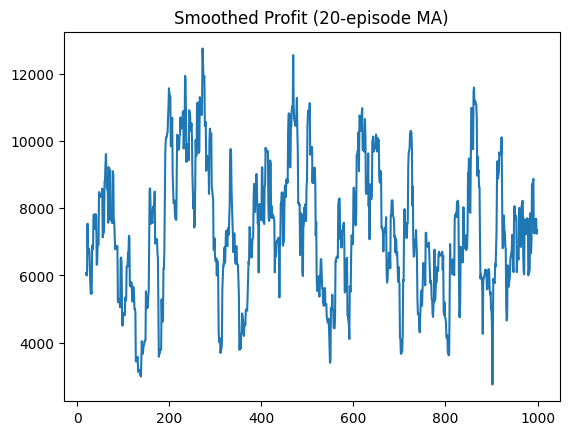

In [21]:
plt.plot(pd.Series(episode_profits).rolling(20).mean())
plt.title("Smoothed Profit (20-episode MA)")
